1. Understanding Sentiment Analysis and RNNs
What is Sentiment Analysis?
Sentiment analysis is a natural language processing (NLP) technique used to determine the sentiment expressed in a piece of text. It is widely used in various applications such as:

Customer feedback analysis: Understanding customer opinions about products or services.
Social media monitoring: Gauging public sentiment on social media platforms.
Market research: Analyzing sentiment trends to inform business decisions.
How RNNs Differ from Traditional Feedforward Neural Networks
Traditional feedforward neural networks process inputs in a single pass, with no memory of previous inputs. RNNs, on the other hand, are designed to handle sequential data by maintaining a hidden state that captures information from previous time steps. This makes them suitable for tasks involving sequences, such as text, speech, and time series data.

The Concept of Hidden States in RNNs
In RNNs, hidden states are vectors that store information about the sequence processed so far. At each time step, the hidden state is updated based on the current input and the previous hidden state, allowing the network to retain and propagate information through the sequence.

Common Issues with RNNs
Vanishing gradients: During training, gradients can become very small, leading to slow learning and difficulty in capturing long-term dependencies.
Exploding gradients: Gradients can become excessively large, causing instability and divergence in the learning process.

2. Dataset Preparation

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the IMDB dataset
imdb = tf.keras.datasets.imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# Pad sequences to ensure uniform input length
x_train = pad_sequences(x_train, maxlen=200)
x_test = pad_sequences(x_test, maxlen=200)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


3. Building the RNN Model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Define the model architecture
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=200),
    LSTM(units=128, return_sequences=False),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


4. Training the Model


In [3]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 172s 540ms/step - accuracy: 0.6953 - loss: 0.5538 - val_accuracy: 0.8530 - val_loss: 0.3407
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 203s 544ms/step - accuracy: 0.9049 - loss: 0.2490 - val_accuracy: 0.8700 - val_loss: 0.3258
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 172s 549ms/step - accuracy: 0.9355 - loss: 0.1781 - val_accuracy: 0.8684 - val_loss: 0.3895
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 199s 540ms/step - accuracy: 0.9560 - loss: 0.1242 - val_accuracy: 0.8612 - val_loss: 0.3673


5. Evaluating the Model

782/782 ━━━━━━━━━━━━━━━━━━━━ 93s 118ms/step - accuracy: 0.8546 - loss: 0.3867
Test Accuracy: 0.8566799759864807


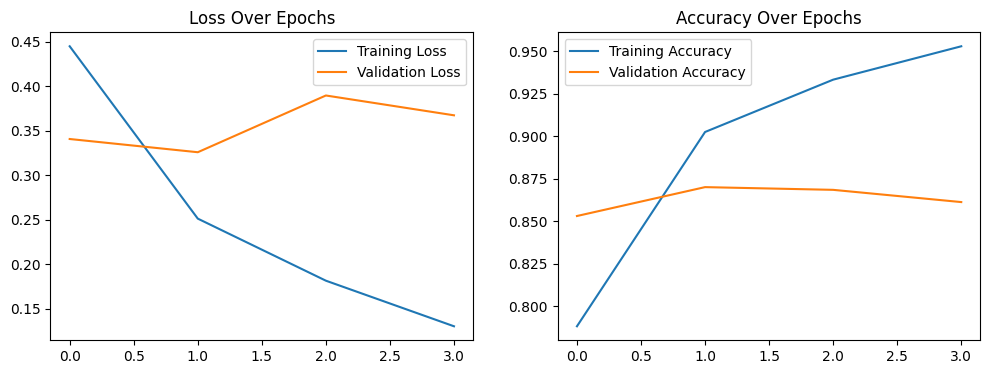

In [4]:
import matplotlib.pyplot as plt

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy}')

# Plot training and validation loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.show()


6. Hyperparameter Tuning
Experimenting with Different Hyperparameters
Try different configurations such as:

Changing the number of layers and units in each layer
Adjusting the dropout rate
Modifying the learning rate

In [5]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

def build_model(units=128, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential([
        Embedding(input_dim=10000, output_dim=128, input_length=200),
        LSTM(units=units, return_sequences=False),
        Dropout(rate=dropout_rate),
        Dense(units=1, activation='sigmoid')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


In [6]:
def train_and_evaluate_model(units, dropout_rate, learning_rate):
    model = build_model(units, dropout_rate, learning_rate)
    history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

    loss, accuracy = model.evaluate(x_test, y_test)
    print(f'Units: {units}, Dropout Rate: {dropout_rate}, Learning Rate: {learning_rate}, Test Accuracy: {accuracy}')

    return history, accuracy


In [7]:
# Different configurations to try
configurations = [
    {'units': 64, 'dropout_rate': 0.2, 'learning_rate': 0.001},
    {'units': 128, 'dropout_rate': 0.2, 'learning_rate': 0.001},
    {'units': 128, 'dropout_rate': 0.5, 'learning_rate': 0.001},
    {'units': 128, 'dropout_rate': 0.2, 'learning_rate': 0.0001},
    {'units': 256, 'dropout_rate': 0.2, 'learning_rate': 0.001}
]

# Track the results
results = []

for config in configurations:
    history, accuracy = train_and_evaluate_model(config['units'], config['dropout_rate'], config['learning_rate'])
    results.append({
        'units': config['units'],
        'dropout_rate': config['dropout_rate'],
        'learning_rate': config['learning_rate'],
        'accuracy': accuracy
    })


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 94s 287ms/step - accuracy: 0.7053 - loss: 0.5413 - val_accuracy: 0.8506 - val_loss: 0.3419
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 140s 279ms/step - accuracy: 0.8973 - loss: 0.2623 - val_accuracy: 0.8696 - val_loss: 0.3109
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 142s 279ms/step - accuracy: 0.9378 - loss: 0.1695 - val_accuracy: 0.8580 - val_loss: 0.3666
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 92s 296ms/step - accuracy: 0.9501 - loss: 0.1397 - val_accuracy: 0.8560 - val_loss: 0.3980
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.8557 - loss: 0.4074
Units: 64, Dropout Rate: 0.2, Learning Rate: 0.001, Test Accuracy: 0.858959972858429
Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 170s 533ms/step - accuracy: 0.6727 - loss: 0.5922 - val_accuracy: 0.7816 - val_loss: 0.4600
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 199s 522ms/step - accuracy: 0.8717 - loss: 0.3206 - val_accuracy: 0.8620 - val_loss: 0.3207
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 210s 547

In [8]:
import pandas as pd

# Create a DataFrame to store the results
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


   units  dropout_rate  learning_rate  accuracy
0     64           0.2         0.0010   0.85896
1    128           0.2         0.0010   0.85692
2    128           0.5         0.0010   0.85912
3    128           0.2         0.0001   0.86256
4    256           0.2         0.0010   0.83564


7. Comparative Analysis

In [9]:
# Define a simple feedforward neural network
ffnn_model = Sequential([
    Dense(units=128, activation='relu', input_shape=(200,)),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
ffnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
ffnn_history = ffnn_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5048 - loss: 331.5732 - val_accuracy: 0.5030 - val_loss: 138.5574
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5571 - loss: 88.3941 - val_accuracy: 0.5036 - val_loss: 60.3065
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5853 - loss: 32.2001 - val_accuracy: 0.5024 - val_loss: 20.5301
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5923 - loss: 9.0871 - val_accuracy: 0.5000 - val_loss: 4.5515
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5610 - loss: 3.1326 - val_accuracy: 0.4976 - val_loss: 2.7842
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5500 - loss: 2.1962 - val_accuracy: 0.5074 - val_loss: 2.1552
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5593 - loss: 1.8724 - val_accuracy: 0.4878 - val_loss: 1.8814
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5441 - loss: 1.7798 - val_accuracy: 0.497

Comparing Performance

In [12]:
# Evaluate the feedforward model
ffnn_loss, ffnn_accuracy = ffnn_model.evaluate(x_test, y_test)
print(f'Feedforward Model Test Accuracy: {ffnn_accuracy}')




782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4918 - loss: 1.6954
Feedforward Model Test Accuracy: 0.49884000420570374


In [13]:
import time

def train_and_evaluate_model(units, dropout_rate, learning_rate):
    model = build_model(units, dropout_rate, learning_rate)

    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])
    end_time = time.time()

    training_time = end_time - start_time

    loss, accuracy = model.evaluate(x_test, y_test)
    print(f'Units: {units}, Dropout Rate: {dropout_rate}, Learning Rate: {learning_rate}, Test Accuracy: {accuracy}, Training Time: {training_time}s')

    return history, accuracy, training_time


In [16]:
# Track the results
results = []

for config in configurations:
    history, accuracy, training_time = train_and_evaluate_model(config['units'], config['dropout_rate'], config['learning_rate'])
    results.append({
        'units': config['units'],
        'dropout_rate': config['dropout_rate'],
        'learning_rate': config['learning_rate'],
        'accuracy': accuracy,
        'training_time': training_time
    })

# Create a DataFrame to store the results
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 91s 284ms/step - accuracy: 0.7118 - loss: 0.5293 - val_accuracy: 0.8376 - val_loss: 0.3687
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 144s 291ms/step - accuracy: 0.9007 - loss: 0.2463 - val_accuracy: 0.8676 - val_loss: 0.3278
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 140s 286ms/step - accuracy: 0.9407 - loss: 0.1651 - val_accuracy: 0.8678 - val_loss: 0.3514
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 89s 286ms/step - accuracy: 0.9581 - loss: 0.1189 - val_accuracy: 0.8576 - val_loss: 0.3895
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.8531 - loss: 0.4123
Units: 64, Dropout Rate: 0.2, Learning Rate: 0.001, Test Accuracy: 0.8556399941444397, Training Time: 465.5622580051422s
Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 169s 529ms/step - accuracy: 0.6547 - loss: 0.6312 - val_accuracy: 0.8360 - val_loss: 0.3829
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 200s 525ms/step - accuracy: 0.8800 - loss: 0.2962 - val_accuracy: 0.8554 - val_loss: 0.3795
Epoch 3/10
313/313 ━━━━

   units  dropout_rate  learning_rate  accuracy  training_time
3    128           0.2         0.0001   0.85812     783.834586
0     64           0.2         0.0010   0.85564     465.562258
4    256           0.2         0.0010   0.85560    1630.858459
2    128           0.5         0.0010   0.84824     988.647858
1    128           0.2         0.0010   0.84700     975.708109


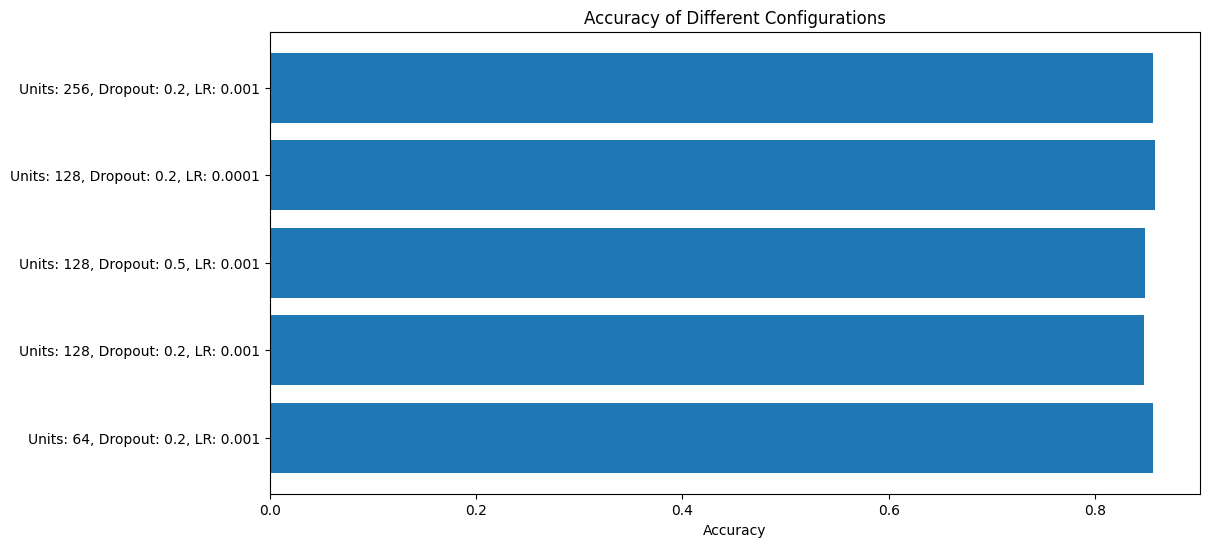

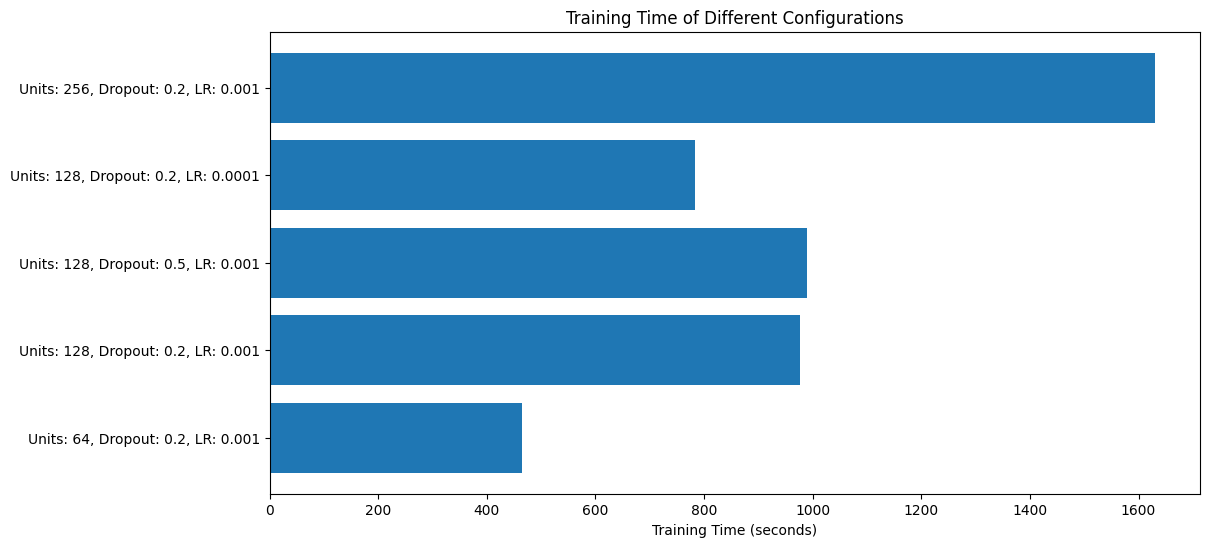

In [17]:
# Display the results sorted by accuracy
print(results_df.sort_values(by='accuracy', ascending=False))

# Plotting the results
import matplotlib.pyplot as plt

# Accuracy vs. Configuration
plt.figure(figsize=(12, 6))
plt.barh(results_df.index, results_df['accuracy'], tick_label=[f"Units: {r['units']}, Dropout: {r['dropout_rate']}, LR: {r['learning_rate']}" for r in results])
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Configurations')
plt.show()

# Training Time vs. Configuration
plt.figure(figsize=(12, 6))
plt.barh(results_df.index, results_df['training_time'], tick_label=[f"Units: {r['units']}, Dropout: {r['dropout_rate']}, LR: {r['learning_rate']}" for r in results])
plt.xlabel('Training Time (seconds)')
plt.title('Training Time of Different Configurations')
plt.show()
